# LatLonProfiles diagnostic - Single line profiles

The aim of this diagnostic is to visualise latitudinal or longitudinal profiles of a certain variable. In addition, plots are allowed to have multiple lines and/or show the seasonal and annual means of the selected variable.

Specifically, in this notebook we look at the code for example plots of a single line zonal profile (along with the reference data).

In [1]:
%reload_ext autoreload
%autoreload 2

Let's start with the import of the classes `LatLonProfiles` and `PlotLatLonProfiles`:

In [2]:
from aqua.diagnostics.lat_lon_profiles import LatLonProfiles
from aqua.diagnostics.lat_lon_profiles import PlotLatLonProfiles

/LUMI_TYKKY_Ld8MU3O/miniforge/envs/env1/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


We generate a dictionary, `dataset_dict`, including the data we want to plot in this notebook.
The plot of a reference profile to be plotted along with the input dataset is optional. If chosen, `obs_dict` is necessary. 
Lastly, `common_dict` include the common features for both datasets (input and reference).

In [3]:
dataset_dict = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly'}
obs_dict = {'catalog': 'obs',
            'model': 'ERA5',
            'exp': 'era5',
            'source': 'monthly',
            'std_startdate': '1990-01-01',
            'std_enddate': '1999-12-31'}
common_dict = {'startdate': '1990-01-01',
               'enddate': '1999-12-31',
               'loglevel': 'info'}

We hence generate an object of the `LatLonProfiles` class, and we decide to plot a zonal profile as an example. This means that the code will be performing the zonal mean, by averaging across the longitudes. 

The analysed variable for this notebook will be `tprate` (Total Precipitation Rate, expressed in mm/day).

By default, the `mean_type` parameter in set as 'zonal' (so the profile will be zonal even without a specific `mean_type` setting), but to visualise the meridional profile, one can just set `mean_type='meridional'`. We also generate another LatLonProfiles object for the reference zonal profile.

The `std=True` option computes the standard deviation and is optional. We set it as `True` for the ERA5 reference profile to enable uncertainty shading in plots. Model data can also compute std, but for plotting simplicity, only reference std shading is directly supported via `ref_std_data`.

In [4]:
lonlat_dataset = LatLonProfiles(**dataset_dict, **common_dict, mean_type='zonal')
lonlat_obs = LatLonProfiles(**obs_dict, **common_dict, mean_type='zonal')

run_dict = {'var': 'tprate',
            'units': 'mm/day'}

lonlat_dataset.run(**run_dict, std=True)
lonlat_obs.run(**run_dict, std=True)

2025-12-01 12:24:52 :: LatLonProfiles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2025-12-01 12:24:52 :: LatLonProfiles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2025-12-01 12:24:52 :: LatLonProfiles :: INFO     -> Running LatLonProfiles for tprate
2025-12-01 12:24:52 :: LatLonProfiles :: INFO     -> Retrieving data for variable tprate


2025-12-01 12:24:52 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-12-01 12:24:52 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-12-01 12:24:52 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-12-01 12:24:52 :: Fixer :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-12-01 12:24:52 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-12-01 12:24:52 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-12-01 12:24:52 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-12-01 12:25:31 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-12-01 12:25:31 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-12-01 12:25:31 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-12-01 12:25:31 :: Regridder :: INFO    

Different types of dataset can be managed and plotted via `LatLonProfiles` and `PlotLatLonProfiles`: 
- Seasonal mean, with season choice between DJF, MAM, JJA and SON
- Annual mean

## Single plot - Seasonal means
We can choose to select a specific season from `lonlat_dataset.seasonal` (which contains [DJF, MAM, JJA, SON]) or use the annual mean from `lonlat_dataset.annual`.

Standard deviation shading is supported for reference data through the `ref_std_data` parameter. This provides uncertainty bands around the reference data to aid in model validation.

The seasonal data is a list with 4 elements:
- Index 0: DJF (December-January-February)  
- Index 1: MAM (March-April-May)
- Index 2: JJA (June-July-August)
- Index 3: SON (September-October-November)

In [5]:
# Seasonal data example:
single_season = lonlat_dataset.seasonal[0]  # DJF (winter)
single_season_obs = lonlat_obs.seasonal[0]  # DJF (winter) for reference

# Annual data example:
# single_annual = lonlat_dataset.annual
# single_annual_obs = lonlat_obs.annual

data_to_use = single_season
ref_data_to_use = single_season_obs

plot_dict = {'data': [data_to_use],  # Note: needs to be a list
             'ref_data': ref_data_to_use,  # Reference data
             'data_type': 'longterm',
             'ref_std_data': lonlat_obs.std_seasonal[0],  # DJF std for reference data
             'loglevel': 'INFO'}

We here plot the single profile, retrieve the plot labels and info via the metadata. Lastly, we save the plot:

2025-12-01 12:26:00 :: PlotLatLonProfiles :: INFO     -> Running PlotLatLonProfiles


2025-12-01 12:26:01 :: create_folder :: INFO     -> Folder ./png already exists
2025-12-01 12:26:01 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.zonal_profile.climatedt-phase1.ICON.historical-1990.r1.tprate.png
2025-12-01 12:26:01 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.zonal_profile.climatedt-phase1.ICON.historical-1990.r1.tprate.png


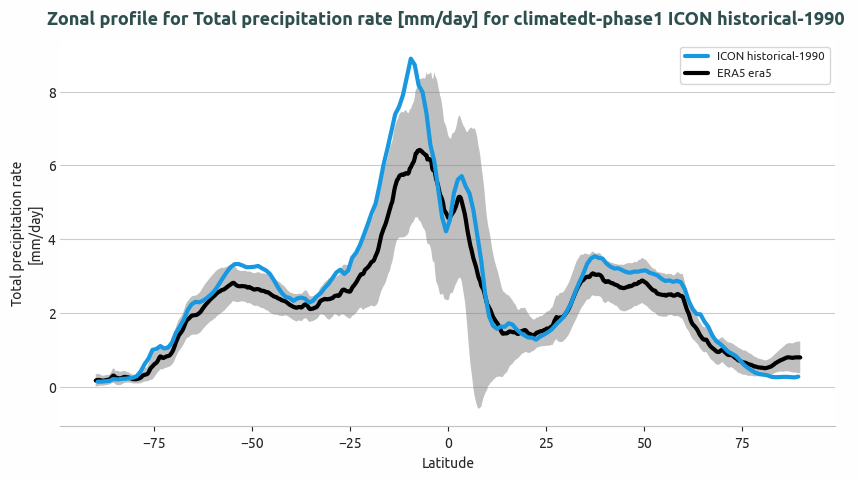

2025-12-01 12:26:01 :: PlotLatLonProfiles :: INFO     -> PlotLatLonProfiles completed successfully


In [6]:
plot = PlotLatLonProfiles(**plot_dict)
plot.run(show=True)

## Single plot - Annual mean

Lastly, with the same logic we plot the annual mean for the `lonlat_dataset` object along with the reference data:

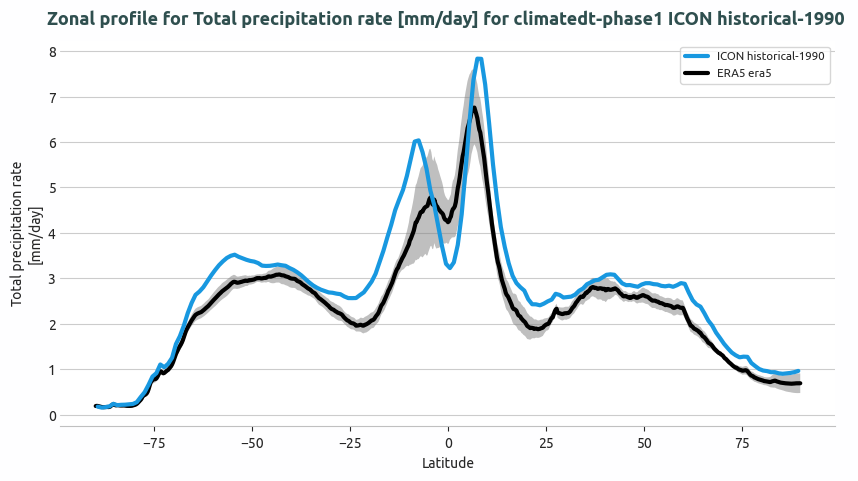

In [7]:
annual_plot = PlotLatLonProfiles(
    data=[lonlat_dataset.longterm],
    ref_data=lonlat_obs.longterm,
    ref_std_data=lonlat_obs.std_annual,
    data_type='longterm'
)
annual_plot.run(show=True)

## Multiple plot - Seasonal mean profiles

Via `PlotLatLonProfiles` we can also show the 4 seasons means represented in four subplots. Standard deviation shading is available for reference data through `ref_std_data`.

2025-12-01 12:26:02 :: PlotLatLonProfiles :: INFO     -> Running PlotLatLonProfiles


2025-12-01 12:26:02 :: create_folder :: INFO     -> Folder ./png already exists
2025-12-01 12:26:03 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.seasonal_zonal_profile.climatedt-phase1.ICON.historical-1990.r1.tprate.png
2025-12-01 12:26:03 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.seasonal_zonal_profile.climatedt-phase1.ICON.historical-1990.r1.tprate.png


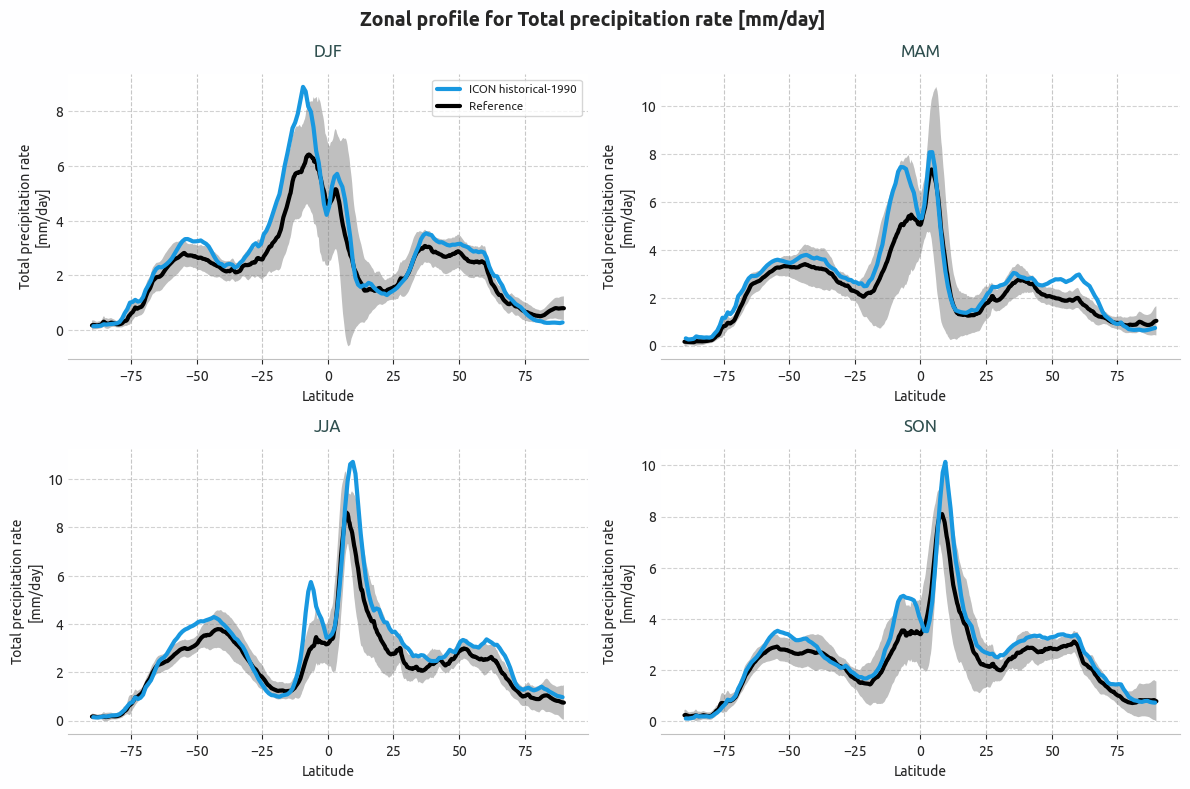

2025-12-01 12:26:03 :: PlotLatLonProfiles :: INFO     -> PlotLatLonProfiles completed successfully


In [8]:
combined_seasonal_model_data = []
combined_seasonal_ref_data = []

for i in range(4):  # DJF, MAM, JJA, SON
    combined_seasonal_model_data.append(lonlat_dataset.seasonal[i])    # Model data as list
    combined_seasonal_ref_data.append(lonlat_obs.seasonal[i])          # Reference data

# Prepare std data for all 4 seasons
ref_std_data = [lonlat_obs.std_seasonal[i] for i in range(4)]  # Reference std for all seasons

seasonal_plot = PlotLatLonProfiles(
    data=combined_seasonal_model_data,  
    ref_data=combined_seasonal_ref_data,
    ref_std_data=ref_std_data,
    data_type='seasonal', 
    loglevel='INFO'
)

seasonal_plot.run(show=True)